Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


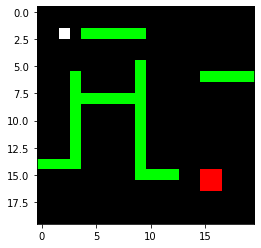

[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [255. 255. 255.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]]


In [19]:
import gym
import matplotlib.pyplot as plt
import numpy as np

map_matrix = np.load("lab12_map_matrix.npy")
plt.imshow(map_matrix)
plt.show()
print(map_matrix)

# white:[255,255,255]
# green:[0,30,0]
# red:[255,0,0]

In [20]:
class Envaronment(object):
    def __init__(self, map_matrix):
        self.nS = len(map_matrix) * len(map_matrix[0])
        self.nA = 4
        self.map_matrix = map_matrix

    def get_P(self):
        # 20*20
        x, y = len(map_matrix), len(map_matrix[0])
        self.position = [[-1 for _ in range(y)] for _ in range(x)]
        for i in range(x):
            for j in range(y):
                if np.all(self.map_matrix == [255.0, 255.0, 255.0]):
                    self.position[i][j] = 0
                elif np.all(self.map_matrix == [0.0, 30.0, 0.0]):
                    self.position[i][j] = -10
                elif np.all(self.map_matrix == [255.0, 0.0, 0.0]):
                    self.position[i][j] = 10

        # 构建P
        self.P = {i: {} for i in range(self.nS)}
        # up, down, left, right - action 0, 1, 2, 3
        up, down, left, right = 0, 1, 2, 3
        p = 0.25
        for m in range(x):
            for n in range(y):
                for j in range(self.nA):
                    i = m * x + n
                    if m - 1 >= 0:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m - 1][n] == 10:
                            flag = True
                        self.P[i][j].append((p, (m - 1) * 20 + n, self.position[m - 1][n], flag))
                    if m + 1 <= 19:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m + 1][n] == 10:
                            flag = True
                        self.P[i][j].append((p, (m + 1) * 20 + n, self.position[m + 1][n], flag))
                    if n - 1 >= 0:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m][n - 1] == 10:
                            flag = True
                        self.P[i][j].append((p, i - 1, self.position[m][n - 1], flag))
                    if n + 1 <= 19:
                        if j not in self.P[i]:
                            self.P[i][j] = []
                        flag = False
                        if self.position[m][n + 1] == 10:
                            flag = True
                        self.P[i][j].append((p, i + 1, self.position[m][n + 1], flag))
                        
                        

In [21]:
env = Envaronment(map_matrix)
env.get_P()
theta = 0.0001
V = np.zeros(env.nS)

while True:
    # Stopping condition
    delta = 0
    # Update 
    discount_factor = 1
    for s in range(env.nS):
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[s][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
                
        best_action_value = np.max(A)
        delta = max(delta, np.abs(best_action_value - V[s]))
        V[s] = best_action_value
    if delta < theta:
        break

print(V)

[  -6.02239213  -11.0447895   -14.85743103  -17.8310285   -20.16691148
  -21.98680597  -23.36944405  -24.36731508  -25.0150548   -25.33387616
  -25.33388412  -25.01507815  -24.36735224  -23.36949246  -21.98686216
  -20.16697124  -17.83108702  -14.85748305  -11.04482957   -6.02241478
  -11.0447895   -20.29935271  -27.55393082  -33.29980232  -37.84984756
  -41.41090885  -44.12369906  -46.08480769  -47.35907548  -47.98661338
  -47.98662895  -47.35912114  -46.08488036  -44.12379373  -41.41101875
  -37.84996444  -33.29991675  -27.55403254  -20.29943105  -11.0448338
  -14.85743103  -27.55393082  -37.75917803  -45.9644531   -52.52182682
  -57.68334905  -61.62970729  -64.48921645  -66.34990327  -67.26695035
  -67.26697301  -66.34996973  -64.48932222  -61.62984508  -57.68350901
  -52.52199694  -45.96461965  -37.7593261   -27.55404485  -14.8574955
  -17.8310285   -33.29980232  -45.9644531   -56.27707423  -64.58973806
  -71.17104317  -76.22266175  -79.8925496   -82.2844754   -83.46441649
  -83.46